# Customer Churn.

**- What is Customer Churn ?**

   - Customer churn is the percentage of customers that stopped using your company's product or service during a certain 
     time frame. Customer churn rate is also known as the rate of attrition.
        
        
**- Objective of this project**

   - Building a prediction model that will perform the following:

      - Classify if a customer is going to churn or not.
      - Selecting a model that will help to retain customers and preventing churn. 

    
**Performance metric**

   - Selecting model based on accuracy score.

# Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'Downloads/customer churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Changing total charges data type from object to float.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
###visualization
df.groupby('Churn').describe().T

Churn                          No          Yes
SeniorCitizen  count  5174.000000  1869.000000
               mean      0.128721     0.254682
               std       0.334923     0.435799
               min       0.000000     0.000000
               25%       0.000000     0.000000
               50%       0.000000     0.000000
               75%       0.000000     1.000000
               max       1.000000     1.000000
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2554.765772  1531.796094
               std    2327.012699  1890.822994
               min      18.800000    18.850000
               25%     579.575000   134.500000
               50%    1689.175000   703.550000
               75%    4262.850000  2331.300000
               max    8672.450000  8684.800000

In [7]:
df.nunique() #getting unique count for each columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

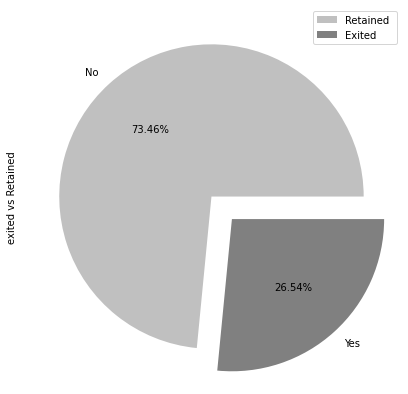

In [8]:
df['Churn'].value_counts().plot(kind = 'pie', explode = [0, 0.2], figsize = (7, 7), autopct = '%1.2f%%', colors =['#C0C0C0','#808080'])
plt.ylabel('exited vs Retained')
plt.legend(['Retained ', 'Exited'])
plt.show()


Total rate of attrition (churn rate ) is 27%.

# Performing Bi-variate analysis.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

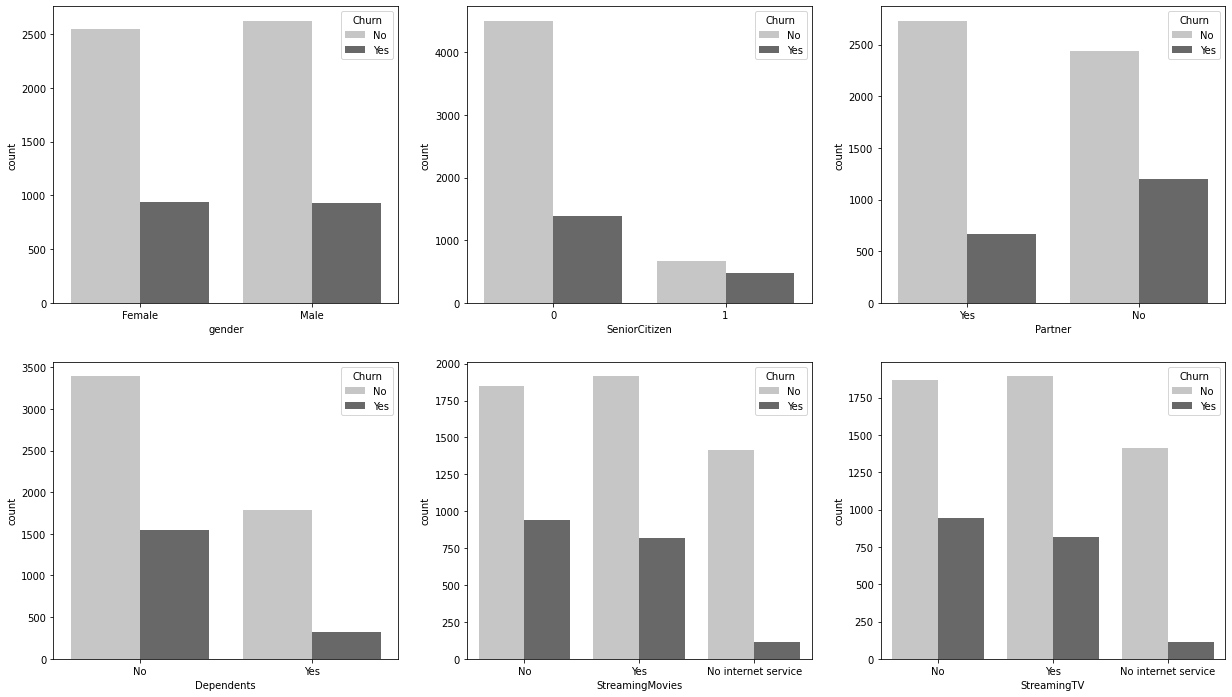

In [9]:
#bivariate analysis 
#for categorical
plt.figure(figsize = (21, 12))
plt.subplot(2, 3, 1)
sns.countplot(x = df["gender"], hue = df['Churn'], palette = 'Greys')

plt.subplot(2, 3, 2)
sns.countplot(x =df['SeniorCitizen'],hue = df['Churn'], palette = 'Greys')

plt.subplot(2, 3, 3)
sns.countplot(x = df['Partner'],hue = df['Churn'], palette = 'Greys')

plt.subplot(2, 3, 4)
sns.countplot(x = df['Dependents'],hue = df['Churn'], palette = 'Greys')

plt.subplot(2, 3, 5)
sns.countplot(x = df['StreamingMovies'],hue = df['Churn'], palette = 'Greys')

plt.subplot(2, 3, 6)
sns.countplot(x =df['StreamingTV'],hue = df['Churn'], palette = 'Greys')


- The proportion of churn is high in Customers with No Dependants and Partners.
- Churning segment is also high in customers with no streaming movies and tv.
- Senior Citizens are less likely to churn
- churning proportion in gender is pretty equal.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

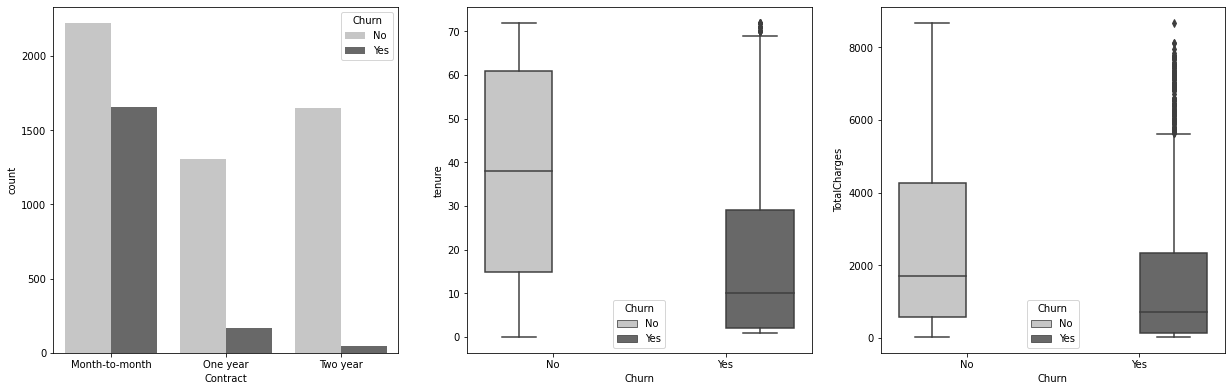

In [10]:
plt.figure(figsize = (21, 14))
plt.subplot(2, 3, 1)
sns.countplot(x =df['Contract'],hue = df['Churn'], palette = 'Greys')

#numerical
plt.subplot(2, 3, 2)
sns.boxplot(y = df['tenure'], x = df['Churn'], hue = df['Churn'], palette = 'Greys')

plt.subplot(2, 3, 3)
sns.boxplot(y = df['TotalCharges'], x = df['Churn'],hue = df['Churn'], palette='Greys')

# plt.subplot(2, 2, 3)
# sns.countplot(x = df['PaymentMethod'], hue = df['Churn'])

- Customers are less likey to be reatined after *month- to - month* contract.
- In tenure, we can see that customer who exited stayed for nearly 10 months.
- customer churned happend nearly where the total charges were below 1500.

# DATA PREPROCESSING

- There are various way we can process data:

     - Using one hot encoder.
     - pandas get_dummies
     - We can also use **.replace** for preprocessing eg df['colname'].replace({'val1':0, 'val2':1}, inplace = True)
        
- Selecting get_dummies technique to preprocess this data.

In [11]:
df2 = pd.get_dummies(df.iloc[:,1:], drop_first=True)
df2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


# Trying Different  Machine learning Algorithms 

In [12]:
from sklearn.model_selection import train_test_split
x = df2.drop('Churn_Yes', axis = 1)
y = df2['Churn_Yes']

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

- We can see that Monthly Charges has strong relation with monthlu Charges.

In [13]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, confusion_matrix, f1_score, recall_score, roc_curve, auc,classification_report

In [14]:
def model_selection(n):
    model = n
    print("Model name : ", model)
    model.fit(x_train , y_train)
    
    model_pred = model.predict(x_test)
    print("\n")
    print("accuracy score: {}".format(accuracy_score(model_pred, y_test) * 100), "\n")
    print("confusion matrix : ", confusion_matrix(model_pred,y_test), "\n")
    print("Precision Score: ", precision_score(model_pred, y_test), "\n")
    print("recall score: ", recall_score(model_pred, y_test), "\n")    
    print("f1 score: ", f1_score(model_pred, y_test), "\n")    
    print("roc auc score: ", roc_auc_score(model_pred, y_test))    
    print("confusion matrix: ", confusion_matrix(model_pred, y_test), "\n")    

In [15]:
#logistic Regression
model_selection(LogisticRegression())

Model name :  LogisticRegression()


accuracy score: 79.98580553584102 

confusion matrix :  [[934 175]
 [107 193]] 

Precision Score:  0.5244565217391305 

recall score:  0.6433333333333333 

f1 score:  0.5778443113772456 

roc auc score:  0.7427667568379922
confusion matrix:  [[934 175]
 [107 193]] 



In [16]:
#xgbclassifier
model_selection(XGBClassifier())

Model name :  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[18:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


accuracy score: 77.85663591199432 

confus

In [17]:
#svc
model_selection(SVC())

Model name :  SVC()


accuracy score: 79.70191625266146 

confusion matrix :  [[952 197]
 [ 89 171]] 

Precision Score:  0.46467391304347827 

recall score:  0.6576923076923077 

f1 score:  0.5445859872611464 

roc auc score:  0.743119434960166
confusion matrix:  [[952 197]
 [ 89 171]] 



In [18]:
#random forest
model_selection(RandomForestClassifier())

Model name :  RandomForestClassifier()


accuracy score: 78.14052519517388 

confusion matrix :  [[928 195]
 [113 173]] 

Precision Score:  0.4701086956521739 

recall score:  0.6048951048951049 

f1 score:  0.529051987767584 

roc auc score:  0.7156265373095293
confusion matrix:  [[928 195]
 [113 173]] 



# HYPERPARAMETER TUNING.

In [19]:
#logistic regression
from sklearn.model_selection import GridSearchCV 

params = {'C':[10, 30, 50, 200,300, 400],'random_state':[100, 200, 300], "max_iter":[100, 200, 150, 50, 250, 300]}
grid1 = GridSearchCV(estimator = LogisticRegression(), param_grid = params, scoring = 'accuracy', cv = 5)
grid1.fit(x_train, y_train)
best_acc = grid1.best_score_
best_param = grid1.best_params_
print("best parameters: ", best_param)

print('best accuracy:', best_acc*100)


best parameters:  {'C': 50, 'max_iter': 50, 'random_state': 100}
best accuracy: 80.6356018351429


In [20]:
from xgboost import XGBClassifier
params = {"learning_rate": [0.01, 0.1], 'eval_metric': ['error']}
grid4 = GridSearchCV(estimator = XGBClassifier(), param_grid = params , scoring = "accuracy", cv = 10)
grid4.fit(x_train, y_train)
best_Acc = grid4.best_score_
best_param = grid4.best_params_

print("best accuracy :", best_Acc*100)
print("best parameters : ", best_param)


best accuracy : 80.5108461509391
best parameters :  {'eval_metric': 'error', 'learning_rate': 0.01}


In [21]:
# random forest
params = {'n_estimators':[100, 200, 300],'criterion':['gini','entropy'],'random_state':[0]}
grid3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params, scoring = "accuracy", cv = 10, verbose = 1)
grid3.fit(x_train, y_train)
best_acc = grid3.best_score_
best_param = grid3.best_params_
print("best parameters: ", best_param)
print("accuracy: ", best_acc*100)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
best parameters:  {'criterion': 'gini', 'n_estimators': 200, 'random_state': 0}
accuracy:  79.94211607019135


In [22]:
#msvm
params = {'C':[10, ],'kernel':['linear', 'rbf'],'random_state':[0]}
grid4 = GridSearchCV(estimator = SVC(), param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid4.fit(x_train, y_train)
best_acc = grid4.best_score_
best_param = grid4.best_params_
print("best parameters: ", best_param)
print("accuracy:", best_acc*100)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
best parameters:  {'C': 10, 'kernel': 'linear', 'random_state': 0}
accuracy: 79.92572115725586


- After hyperparameter tuning, LogisticRegression and XGBClassifier has performed better also they both are showing accuracy around 81%. 
- As we can choose any one of them, Thus moving forward with Logistic regression.

# Fitting model

In [23]:
# model = XGBClassifier(eval_metric= 'error', learning_rate= 0.01)
model = LogisticRegression(C= 50, max_iter= 50, random_state= 100)
model.fit(x_train , y_train)
    
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
    
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("\n")
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_pred, y_test), "\n")
print("recall score: ", recall_score(y_pred, y_test), "\n")    
print("f1 score: ", f1_score(y_pred, y_test), "\n")    
print("roc auc score: ", roc_auc_score(y_pred, y_test))    
print("confusion matrix: ", confusion_matrix(y_pred, y_test), "\n")    

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



ROC AUC score: 0.8274025811301843
Accuracy Score:  0.7984386089425124
Precision Score:  0.5217391304347826 

recall score:  0.64 

f1 score:  0.5748502994011976 

roc auc score:  0.7406492335437331
confusion matrix:  [[933 176]
 [108 192]] 



In [24]:
x =model.predict(x_train)
print("accuracy for training data : ", accuracy_score(x, y_train))

y = model.predict(x_test)
print("accuracy for test data: ", accuracy_score(y, y_test))

accuracy for training data :  0.8081292154774583
accuracy for test data:  0.7984386089425124


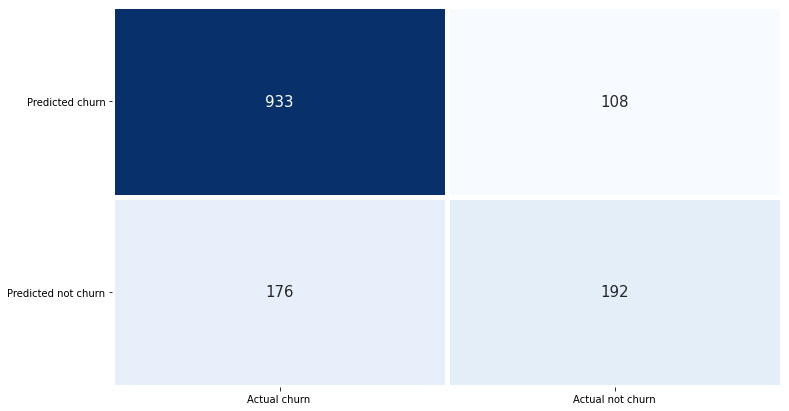

Text(0.5, 0, 'False Positive Rate')

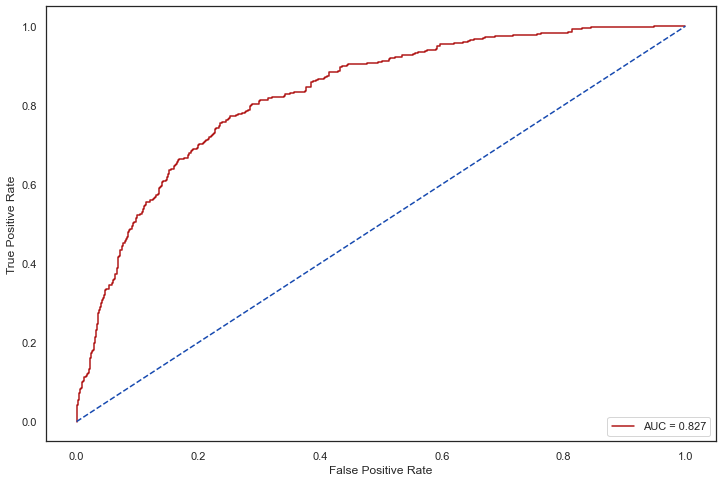

In [25]:
plt.figure(figsize = (12, 7))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Predicted churn', 'Predicted not churn'], xticklabels = ['Actual churn ', 'Actual not churn'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
sns.set_theme(style = 'white')
plt.figure(figsize = (12, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

-- We'll understand through confusion matrix.

- True Postive rate : true positive / (true positive + false negative) = (993/(993+176) = 85%
    
    
   **- Model will catch 85% of the customers that will cause churn.**
    
    

- True Negative rate : false positive / (false positive + true negative ) = 108 /(108 + 192) = 64%


    
   **- model will catch 64% of the customer will not cause churn.**
    
    

- Positive Predicted : True positive / (true positive + false positive)= 993 / (993 + 108 ) = 90%


    
   **- out of this customer it is predicted that    will actuallu cause churn**
    
    

- Negative predicted : false negative ( false negative + true negative ) = 176 / (176 + 192 ) = 45 %


    
   **- out of this customer it is predicted that    will actually not churn.**

## Breakdown of this project.

-  understand the dataset.
-  Handle missing values or handle data type as I did in this project.
-  Perform Exploratory Data Analysis
-  Data Preprocessing
-  Train Test Split
-  Apply Different Machine learning Algorithms
-  Hypertune Parameters-- (Try different Parameters)
-  Once you obtain good accuracy. Fit the model.

**THANK YOU**